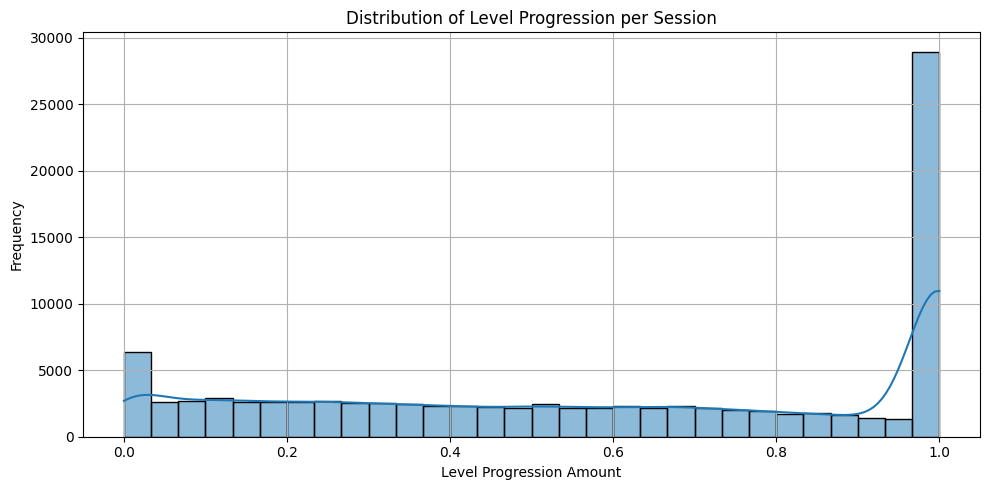

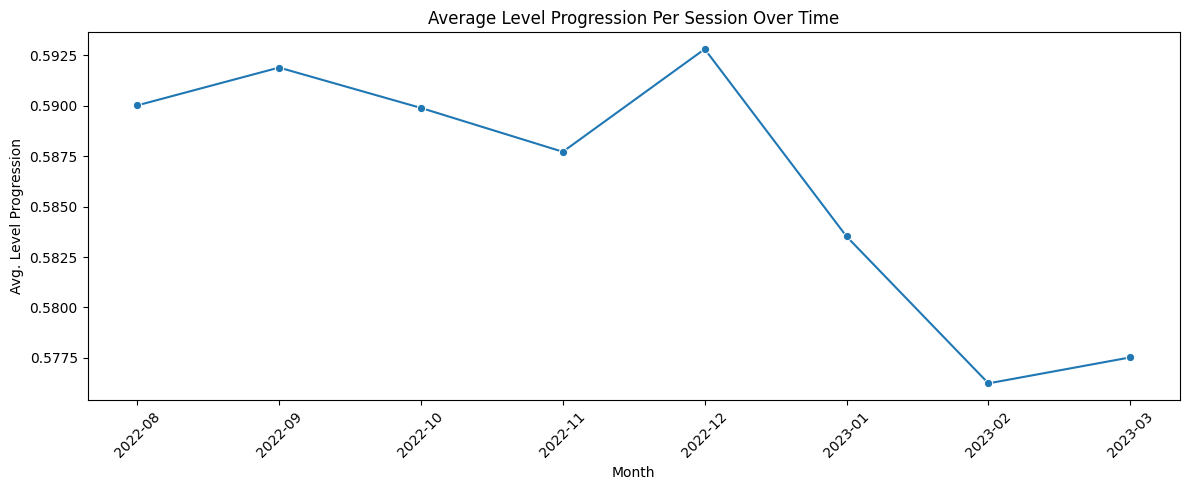

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/exited_game.csv')
data['Time'] = pd.to_datetime(data['Time'])
data['Month'] = data['Time'].dt.to_period('M').astype(str)

#Filters out nulls or invalid entries in LevelProgressionAmount
data = data[data['LevelProgressionAmount'].notna()]
data = data[data['LevelProgressionAmount'] >= 0]



#Summary stats
progression_by_player = data.groupby('pid')['LevelProgressionAmount'].sum().reset_index()
progression_by_player.columns = ['pid', 'TotalProgression']



#Plots distribution of level progression per session
plt.figure(figsize=(10, 5))
sns.histplot(data['LevelProgressionAmount'], bins=30, kde=True)
plt.title('Distribution of Level Progression per Session')
plt.xlabel('Level Progression Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()



#Plots Average level progression per session over time
progression_over_time = data.groupby('Month')['LevelProgressionAmount'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=progression_over_time, x='Month', y='LevelProgressionAmount', marker='o')
plt.title('Average Level Progression Per Session Over Time')
plt.xlabel('Month')
plt.ylabel('Avg. Level Progression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Reflection
- Average level progression should be a pretty good indication of if players are having fun.

# Observations
Level pergression over time peaks at the beginning slightly and the end a lot, remaining constantly low then inbetween these points with a slight but notable decline towards the end.

# Evaluation
This small and simple observations has a pretty telling story behind it. Players just starting a level are likely to exit or quit that level almost immediatly. This may be due to choosing the wrong level, realising they don't like the level after seeing it in game or deciding they dont actually want to play once the game has launched and they've entered a level.

The largest spike at the end of the graph indicated that players are more likely to complete and entire level in one session than not, this is a good indiaction of them having fun and enjoying the levels enough to complete them in a single sitting.

The small leveled off average in between the start and finish of the graph tells us players are unlikely (but just as likely) to exit or quite at any point throughout the level once they have made some progression, this consistancy I believe is a good sign of player retention, at no point does the level become too hard to too boring to complete. It is notable that there is a slow decilne in this average as we come closer to full completion, likely meaning once players have invested significant time in the level already, as they come closer to the end there is a sunk cost falicy enouraging them to just complete the level outright.